<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 7**

# **Weeks 8 & 9 - Pandas**

## *Author: Kristin Lussi*

# Introduction

The dataset I will be exploring in this project is the Median Asking Rent for Studio Rentals data from StreetEasy. This dataset can be found on the following website: https://streeteasy.com/blog/data-dashboard/ 

I chose this dataset because I want to determine the following:
1. Is there trend between rental prices and months (i.e. what is the best month(s) to rent)?
2. Which areas of the Manhattan are the most expensive?
3. How much have rental prices changed from year-to-year?

I will only be looking at Manhattan rentals in this project.

______________
# Data Exploration




### Import Data

In [2]:
import pandas as pd # import pandas
import numpy as np # import numpy
import matplotlib.pyplot as plt
import seaborn as sns

# specify the file path
file_path = "/Users/kristinlussi/Documents/MSDS/DATA602/Week8/medianAskingRent_Studio.csv" 

# read the csv file from the file path
rent_data = pd.read_csv(file_path) 

### Glimpse of Data

In [3]:
print(rent_data.head())

              areaName    Borough   areaType  2010-01  2010-02  2010-03  \
0         All Downtown  Manhattan  submarket   2343.0   2300.0   2200.0   
1          All Midtown  Manhattan  submarket   2000.0   1995.0   1995.0   
2  All Upper East Side  Manhattan  submarket   1750.0   1750.0   1750.0   
3  All Upper Manhattan  Manhattan  submarket   1175.0   1150.0   1150.0   
4  All Upper West Side  Manhattan  submarket   1800.0   1800.0   1795.0   

   2010-04  2010-05  2010-06  2010-07  ...  2023-05  2023-06  2023-07  \
0   2250.0   2300.0   2297.0   2275.0  ...   3562.0   3567.0   3513.0   
1   2000.0   2000.0   2000.0   2050.0  ...   3400.0   3400.0   3400.0   
2   1780.0   1800.0   1750.0   1750.0  ...   2550.0   2600.0   2600.0   
3   1150.0   1150.0   1195.0   1250.0  ...   2195.0   2150.0   2100.0   
4   1800.0   1895.0   1895.0   1800.0  ...   2879.0   2897.0   2946.0   

   2023-08  2023-09  2023-10  2023-11  2023-12  2024-01  2024-02  
0   3528.0   3508.0   3477.0   3400.0   349

### Summary Statistics

In [4]:
# find the summary statistics of the data
summary_statistics = rent_data.describe() 
print(summary_statistics)

           2010-01      2010-02      2010-03      2010-04      2010-05  \
count    49.000000    50.000000    54.000000    54.000000    50.000000   
mean   1839.591837  1832.260000  1821.314815  1846.425926  1844.700000   
std     636.386214   566.929028   541.961874   563.067897   554.226258   
min     950.000000   950.000000   950.000000   950.000000   900.000000   
25%    1430.000000  1462.500000  1403.250000  1362.500000  1362.500000   
50%    1775.000000  1793.000000  1795.000000  1827.500000  1872.500000   
75%    2100.000000  2078.000000  2164.750000  2285.000000  2275.000000   
max    4500.000000  4025.000000  3200.000000  3350.000000  3113.000000   

           2010-06      2010-07      2010-08      2010-09      2010-10  ...  \
count    48.000000    51.000000    48.000000    43.000000    42.000000  ...   
mean   1806.812500  1825.078431  1881.666667  1992.046512  2008.547619  ...   
std     569.692924   532.519665   545.076623   574.743295   558.899625  ...   
min     900.00000

### Average Median Rent by Borough 2010-2024

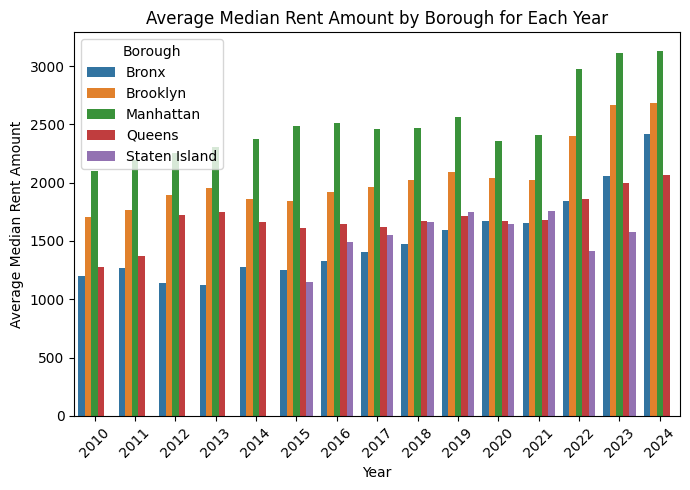

In [5]:
# pivot DataFrame to long format 
df_long = pd.melt(rent_data, id_vars=['areaName', 'Borough', 'areaType'], var_name='Year', value_name='RentAmount')
# extract only the year from year column
df_long['Year_Actual'] = df_long['Year'].str[:4]

# group the data by borough and year, and calculate the average rent amount for each group
rent_by_borough_year = df_long.groupby(['Borough', 'Year_Actual'])['RentAmount'].mean().reset_index()

# create bar chart
plt.figure(figsize=(7, 5))
sns.barplot(data=rent_by_borough_year, x='Year_Actual', y='RentAmount', hue='Borough')
plt.title('Average Median Rent Amount by Borough for Each Year')
plt.xlabel('Year')
plt.ylabel('Average Median Rent Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the above chart, we can see that on average, Manhattan and Brooklyn are the most expensive boroughs. 

# Data Wrangling

The following code chunk satisfies some of the data wrangling requirements of this assignment. 

In [6]:
# selecting only the area name, borough, and years January 2013 - December 2023 "dropping columns"
rent_13_23_all = rent_data.iloc[:, list(range(2)) + list(range(39,171))] 

# I created a copy to remove an error message
rent_13_23_all = rent_13_23_all.copy()

# rename areaName to AreaName
rent_13_23_all.rename(columns = {"areaName": "AreaName"},inplace = True) 

# drop rows where borough is NA
rent_13_23 = rent_13_23_all.dropna(subset='Borough') 

# convert all values to lowercase in the Borough column
rent_13_23.loc[:, 'Borough'] = rent_13_23['Borough'].str.lower()

# sort by borough and then area name
sorted_rentals = rent_13_23.sort_values(by=["Borough", "AreaName"], ascending = True) 

# print data types for each column
print(rent_data.dtypes) 

areaName     object
Borough      object
areaType     object
2010-01     float64
2010-02     float64
             ...   
2023-10     float64
2023-11     float64
2023-12     float64
2024-01     float64
2024-02     float64
Length: 173, dtype: object


## Manhattan

In this section, we will wrangle the data to answer the questions proposed in the introduction.

In [7]:
# filter the sorted_rentals for Manhattan only
manhattan_rentals = sorted_rentals[sorted_rentals['Borough']=="manhattan"] 

# melt the months to rows and areas to columns
transformed_manhattan = manhattan_rentals.melt(id_vars=['AreaName', 'Borough'], var_name='Month_Year', value_name='Rent') 

# extract the year and month from the Month_Year column
transformed_manhattan['Year'] = transformed_manhattan['Month_Year'].str[:4]
transformed_manhattan['Month'] = transformed_manhattan['Month_Year'].str[5:]

# pivot the DataFrame to put each year into its own column
transformed_manhattan = transformed_manhattan.pivot_table(index=['AreaName', 'Borough', 'Month'], columns='Year', values='Rent').reset_index()

# sort the DataFrame by month
transformed_manhattan = transformed_manhattan.sort_values(by=['AreaName','Month'])

# print the data frame
print(transformed_manhattan.head())

Year      AreaName    Borough Month    2013    2014    2015    2016    2017  \
0     All Downtown  manhattan    01  2600.0  2675.0  2700.0  2775.0  2705.0   
1     All Downtown  manhattan    02  2600.0  2650.0  2756.0  2800.0  2775.0   
2     All Downtown  manhattan    03  2600.0  2700.0  2800.0  2820.0  2750.0   
3     All Downtown  manhattan    04  2600.0  2750.0  2800.0  2850.0  2750.0   
4     All Downtown  manhattan    05  2595.0  2750.0  2800.0  2838.0  2750.0   

Year    2018    2019    2020    2021    2022    2023  
0     2708.0  2850.0  2995.0  2300.0  3300.0  3500.0  
1     2725.0  2900.0  2995.0  2385.0  3450.0  3500.0  
2     2750.0  2875.0  2900.0  2407.0  3495.0  3500.0  
3     2750.0  2895.0  2825.0  2495.0  3500.0  3540.0  
4     2795.0  2950.0  2700.0  2523.0  3450.0  3562.0  


### Rent Prices by Month (2013 vs 2018, vs 2023) for Each Area of Manhattan

<Figure size 300x200 with 0 Axes>

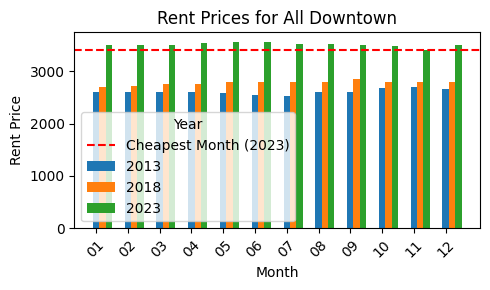

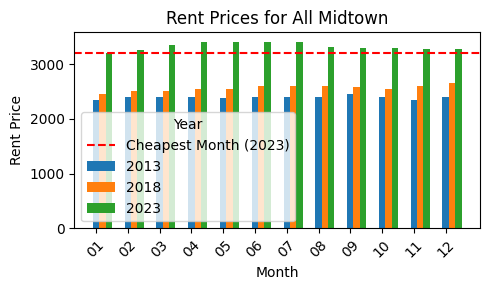

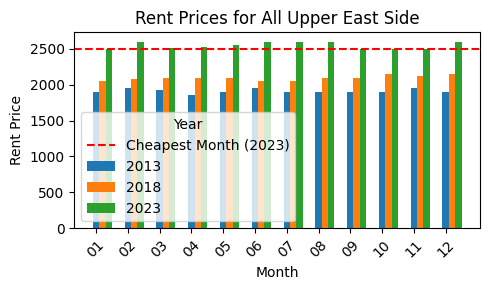

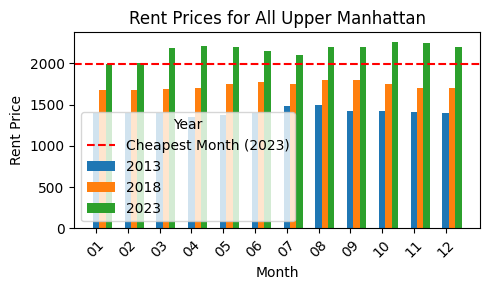

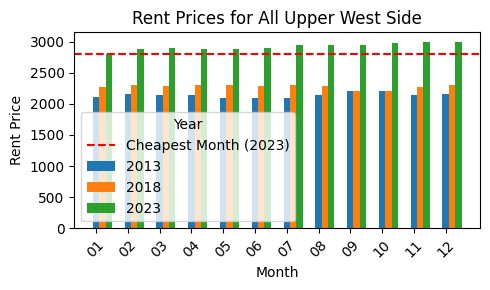

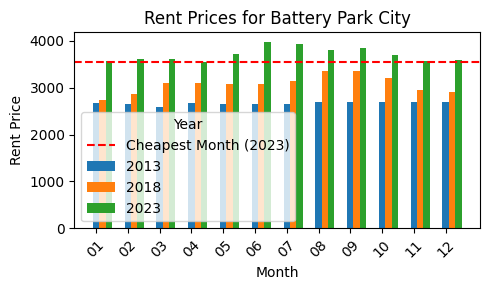

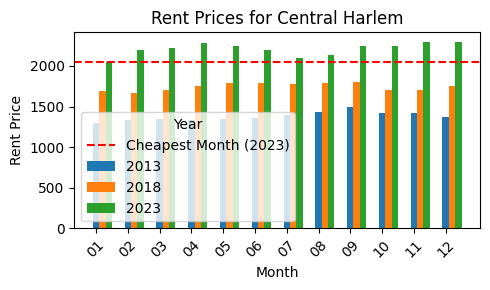

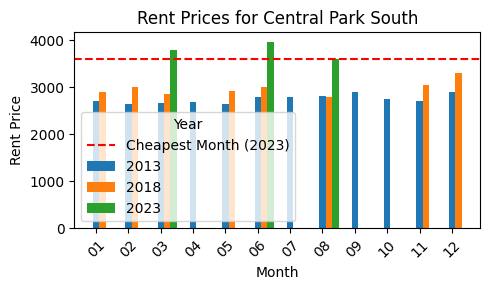

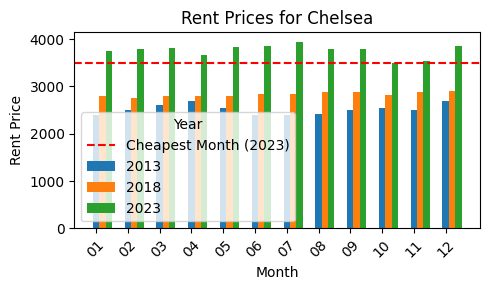

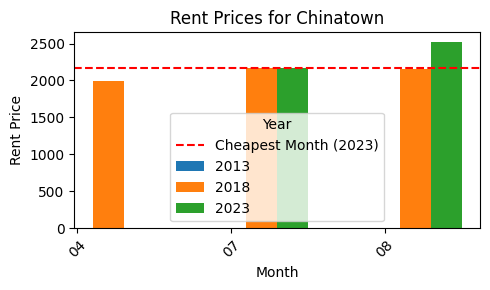

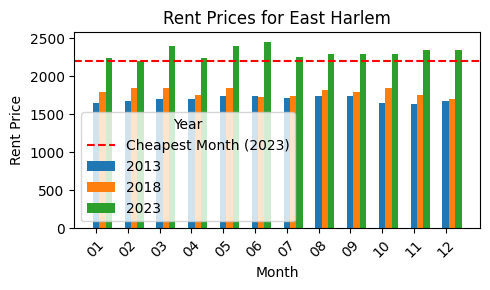

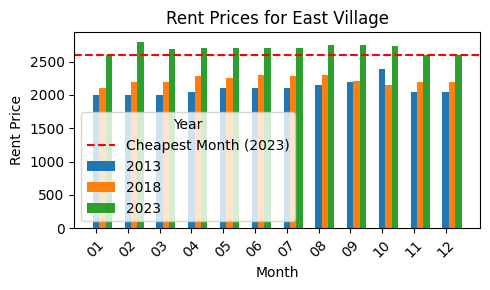

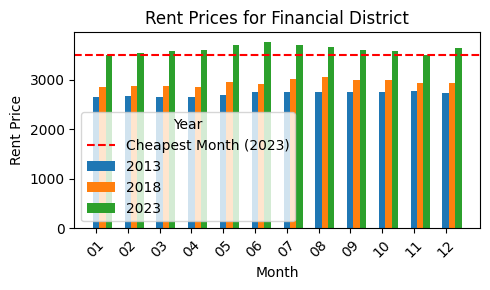

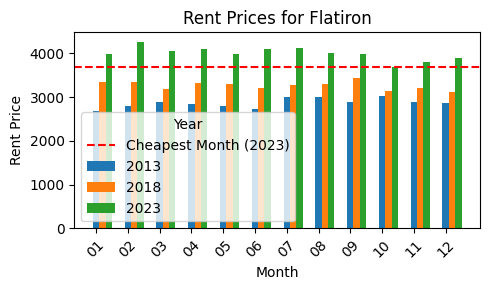

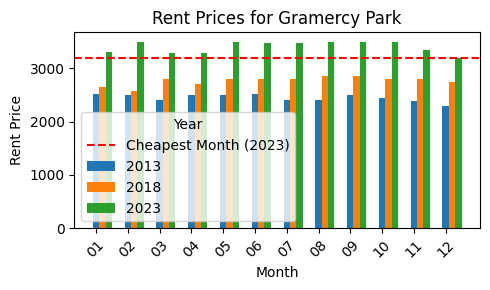

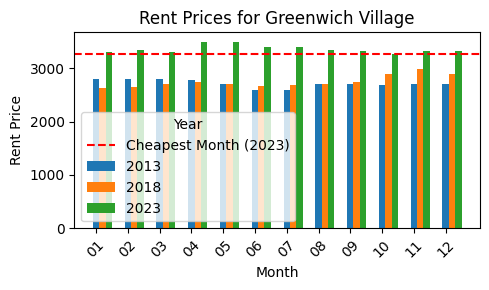

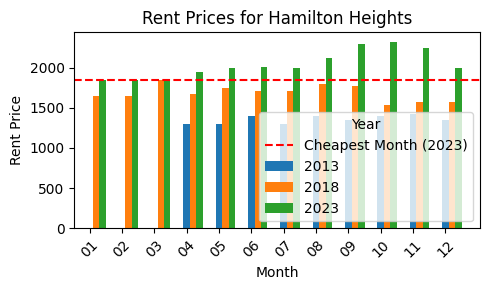

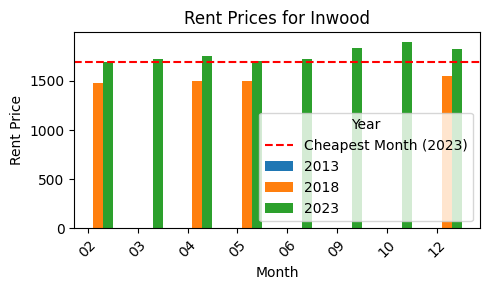

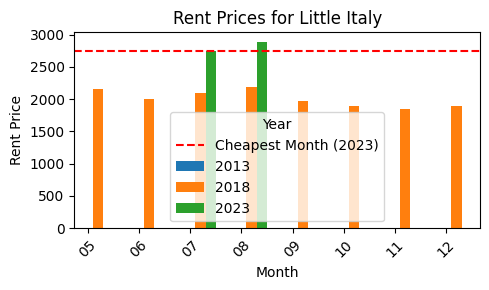

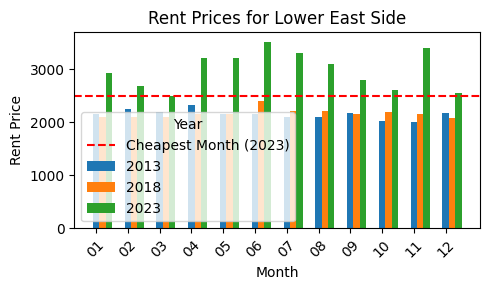

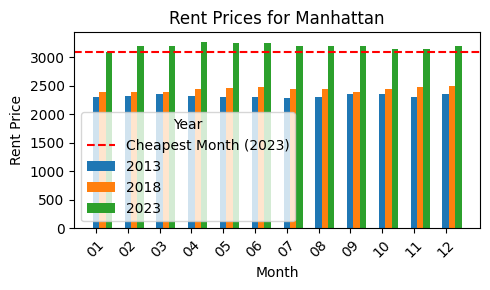

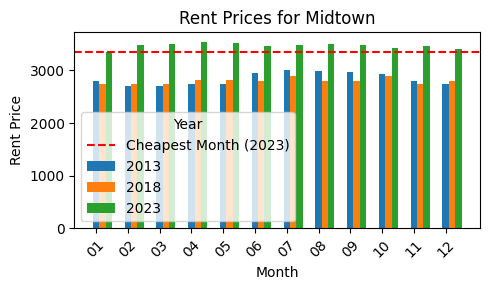

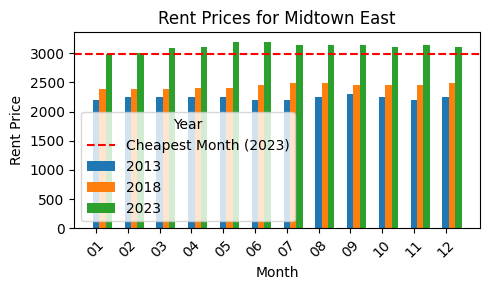

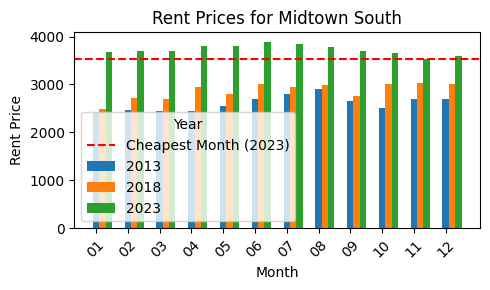

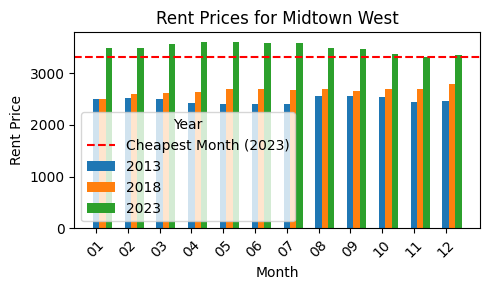

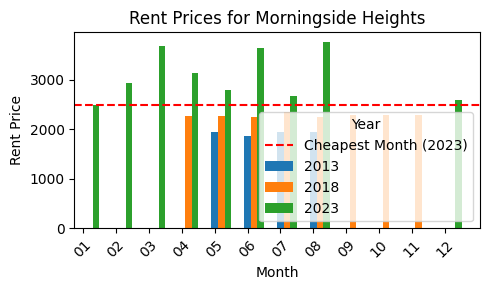

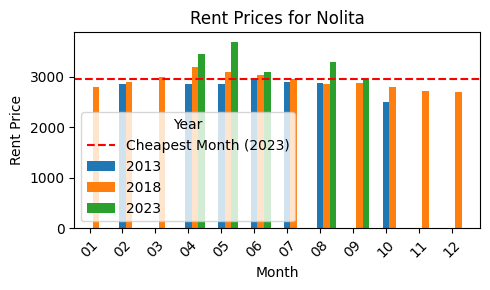

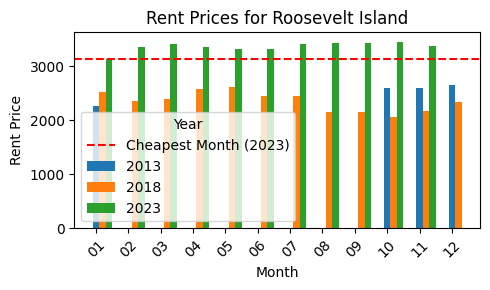

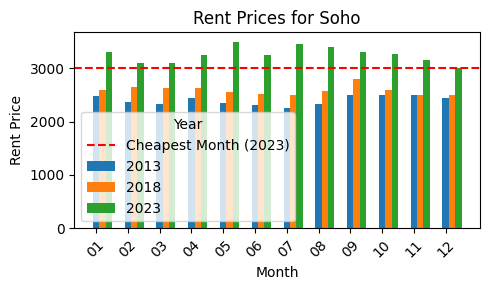

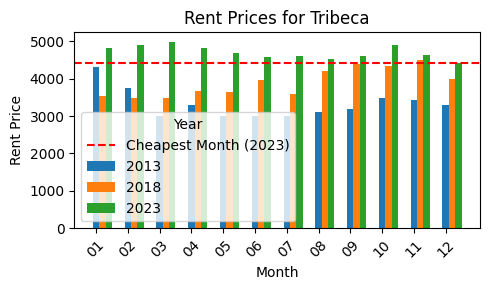

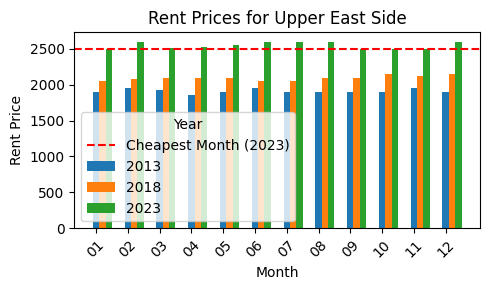

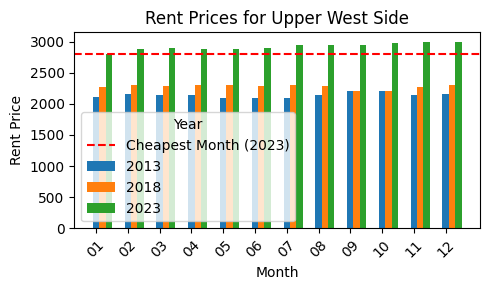

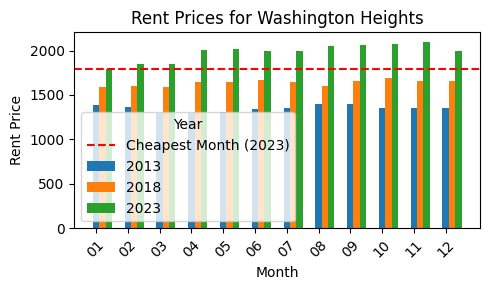

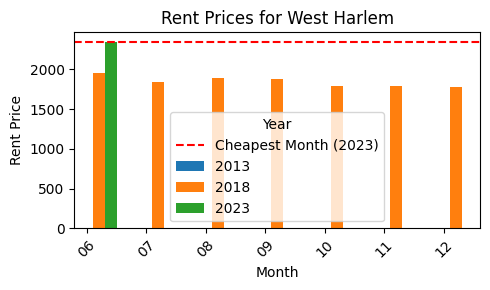

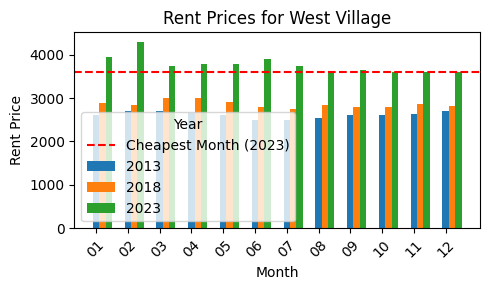

In [19]:
# melt the DataFrame to convert the year columns to long format
melted_manhattan = pd.melt(transformed_manhattan, id_vars=['AreaName', 'Borough', 'Month'], 
                            value_vars=['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'], 
                            var_name='Year', value_name='Rent')

# filter the melted dataframe for years 2013, 2018, and 2023
filtered_melted_manhattan = melted_manhattan[melted_manhattan['Year'].isin(['2013', '2018', '2023'])]

# pivot the filtered dataframe to have years as columns
pivot_table = filtered_melted_manhattan.pivot_table(index=['AreaName', 'Month'], columns='Year', values='Rent').reset_index()

# set the figure size
plt.figure(figsize=(3, 2))

# iterate over each area name
for area in pivot_table['AreaName'].unique():
    area_data = pivot_table[pivot_table['AreaName'] == area]
    
    # create a plot 
    plt.figure(figsize=(5, 3))
    
    # plot rent prices for each year 
    for i, year in enumerate(['2013', '2018', '2023']):
        # calculate the positions for the bars
        bar_positions = area_data.index + i * 0.2
        
        # plot bars for the current year
        plt.bar(bar_positions, area_data[year], width=0.2, label=year)

    # convert rent values to numeric
    area_data_numeric = area_data.drop(columns=['AreaName', 'Month']).apply(pd.to_numeric, errors='coerce')

    # filter the DataFrame to include only the columns for the year 2023
    area_data_2023 = area_data_numeric['2023']

    # plot horizontal line at the shortest bar for the year 2023
    min_rent_2023 = area_data_2023.min()
    plt.axhline(y=min_rent_2023, color='red', linestyle='--', label='Cheapest Month (2023)')
    
    # labels and title
    plt.xlabel('Month')
    plt.ylabel('Rent Price')
    plt.title(f'Rent Prices for {area}')
    plt.xticks(area_data.index, area_data['Month'], rotation=45)
    plt.legend(title='Year')

    # show the plot
    plt.tight_layout()
    plt.show()



In [9]:
# group the filtered DataFrame by Year and AreaName and calculate the mean rent for each area within each year
mean_rent_by_year_area = filtered_melted_manhattan.groupby(['Year', 'AreaName'])['Rent'].mean().reset_index()

# sort the DataFrame by the highest rent prices for each AreaName separately for each year
sorted_rent_by_year_area = mean_rent_by_year_area.sort_values(by=['Year', 'Rent'], ascending=[True, False])

# filter for 2023 only
sorted_rent_area_2023 = sorted_rent_by_year_area[sorted_rent_by_year_area['Year']=='2023']

# display first 5 items of the sorted DataFrame
print(sorted_rent_area_2023.head())

     Year            AreaName         Rent
99   2023             Tribeca  4707.666667
83   2023            Flatiron  3997.916667
77   2023  Central Park South  3791.000000
104  2023        West Village  3769.916667
78   2023             Chelsea  3761.500000


From the above dataframe, we can see that the most expensive areas in Manhattan for 2023 were:
1. Tribeca
2. Flatiron
3. Central Park South
4. West Village
5. Chelsea

### Average Change in Rent for Each Area

#### 1 Year Change

In [10]:
# calculate 1 year change
transformed_manhattan['1_year_change'] = transformed_manhattan.groupby(['AreaName', 'Month'])['2023'].transform('first') - transformed_manhattan.groupby(['AreaName', 'Month'])['2022'].transform('first')

# calculate the average 1 year change for each area name
average_change_manhattan_1 = transformed_manhattan.groupby('AreaName')['1_year_change'].mean()
print(average_change_manhattan_1)

AreaName
All Downtown            60.083333
All Midtown            134.333333
All Upper East Side    123.416667
All Upper Manhattan    212.833333
All Upper West Side    185.583333
Battery Park City       62.250000
Central Harlem         161.583333
Central Park South            NaN
Chelsea                -74.000000
Chinatown               50.000000
East Harlem            309.583333
East Village            51.500000
Financial District      70.250000
Flatiron                97.000000
Gramercy Park          144.416667
Greenwich Village      128.583333
Hamilton Heights       213.000000
Inwood                  87.571429
Little Italy                  NaN
Lower East Side        351.833333
Manhattan              219.666667
Midtown                 46.916667
Midtown East           155.166667
Midtown South           -2.583333
Midtown West            53.083333
Morningside Heights    442.666667
Nolita                 195.000000
Roosevelt Island       308.100000
Soho                  -216.416667
Tribe

In [11]:
# print the average 1 year change for all areas combined
print(average_change_manhattan_1.mean()) 

130.9845238095238


#### 5 Year Change

In [12]:
# calculate 5 year change
transformed_manhattan['5_year_change'] = transformed_manhattan.groupby(['AreaName', 'Month'])['2023'].transform('first') - transformed_manhattan.groupby(['AreaName', 'Month'])['2018'].transform('first')

# calculate the average 5 year change for each area name
average_change_manhattan_5 = transformed_manhattan.groupby('AreaName')['5_year_change'].mean()
print(average_change_manhattan_5)

AreaName
All Downtown            727.166667
All Midtown             763.083333
All Upper East Side     453.500000
All Upper Manhattan     431.916667
All Upper West Side     643.416667
Battery Park City       633.083333
Central Harlem          467.833333
Central Park South      908.333333
Chelsea                 930.250000
Chinatown               187.500000
East Harlem             524.333333
East Village            472.250000
Financial District      679.250000
Flatiron                734.666667
Gramercy Park           642.500000
Greenwich Village       609.416667
Hamilton Heights        352.250000
Inwood                  235.500000
Little Italy            675.000000
Lower East Side         817.000000
Manhattan               754.500000
Midtown                 665.250000
Midtown East            676.916667
Midtown South           853.500000
Midtown West            830.250000
Morningside Heights     928.200000
Nolita                  285.600000
Roosevelt Island       1006.545455
Soho       

In [13]:
# print the 5 year average change for all areas combined
print(average_change_manhattan_5.mean())

631.771774891775


#### 10 Year Change

In [14]:
# calculate 10 year change
transformed_manhattan['10_year_change'] = transformed_manhattan.groupby(['AreaName', 'Month'])['2023'].transform('first') - transformed_manhattan.groupby(['AreaName', 'Month'])['2013'].transform('first')

# calculate the average 10 year change for each area name
average_change_manhattan_10 = transformed_manhattan.groupby('AreaName')['10_year_change'].mean()
print(average_change_manhattan_10)

AreaName
All Downtown            898.333333
All Midtown             929.333333
All Upper East Side     639.333333
All Upper Manhattan     747.250000
All Upper West Side     776.666667
Battery Park City      1037.000000
Central Harlem          829.833333
Central Park South     1026.666667
Chelsea                1245.750000
Chinatown                      NaN
East Harlem             616.583333
East Village            594.750000
Financial District      902.333333
Flatiron               1130.750000
Gramercy Park           957.583333
Greenwich Village       649.250000
Hamilton Heights        745.888889
Inwood                         NaN
Little Italy                   NaN
Lower East Side         832.416667
Manhattan               876.833333
Midtown                 626.666667
Midtown East            879.083333
Midtown South          1113.583333
Midtown West           1017.083333
Morningside Heights    1293.250000
Nolita                  505.000000
Roosevelt Island        827.666667
Soho       

In [15]:
# print the 10 year average change for all areas combined
print(average_change_manhattan_10.mean())

875.8243727598567


### Average Median Rent by Month in the Past 3 Years (2021-2023) 

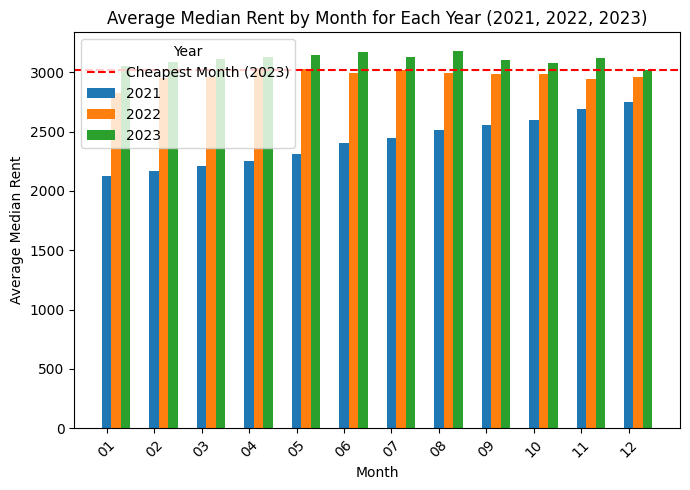

In [16]:
# filter the melted DataFrame for years 2021, 2022, and 2023
melted_manhattan5 = melted_manhattan[melted_manhattan['Year'].isin(['2021', '2022', '2023'])]

# group the filtered DataFrame by year
grouped_by_year_month = melted_manhattan5.groupby(['Year','Month'])

# calculate average median rent by month for each year
average_median_by_year = grouped_by_year_month['Rent'].mean().unstack()

# plot the average median rent by month for each year
plt.figure(figsize=(7, 5))
for i, year in enumerate(average_median_by_year.index):
    # Calculate bar positions to plot bars side by side
    bar_positions = range(len(average_median_by_year.columns))  
    plt.bar([x + i*0.2 for x in bar_positions], average_median_by_year.loc[year], width=0.2, label=year)

# add a line for the cheapest month in 2023
shortest_bar_2023 = average_median_by_year.loc['2023'].min()
plt.axhline(y=shortest_bar_2023, color='red', linestyle='--', label='Cheapest Month (2023)')


# add labels and title
plt.xlabel('Month')
plt.ylabel('Average Median Rent')
plt.title('Average Median Rent by Month for Each Year (2021, 2022, 2023)')
plt.legend(title='Year')
plt.xticks(range(len(average_median_by_year.columns)), average_median_by_year.columns, rotation=45)
plt.tight_layout()

# show the plot
plt.show()

In [17]:
# group the DataFrame by year and sort the median rent values within each year from highest to lowest
average_median_by_year_sorted = average_median_by_year.apply(lambda x: x.sort_values(ascending=False), axis=1)
# print DataFrame
print(average_median_by_year_sorted)

Month           01           02           03           04           05  \
Year                                                                     
2021   2123.411765  2164.029412  2207.676471  2252.235294  2311.058824   
2022   2829.482759  2950.500000  2961.724138  3039.566667  3029.935484   
2023   3050.827586  3082.900000  3113.322581  3127.032258  3148.870968   

Month           06      07           08           09           10  \
Year                                                                
2021   2401.121212  2450.5  2512.088235  2552.366667  2596.666667   
2022   2991.066667  3015.9  2991.656250  2985.275862  2982.366667   
2023   3175.121212  3132.0  3178.000000  3106.766667  3079.724138   

Month           11           12  
Year                             
2021   2693.066667  2752.500000  
2022   2941.000000  2961.200000  
2023   3119.464286  3018.689655  


From the above chart, it is hard to see if the years follow the same trends. 

With the dataframe above, it is easier to see which months had cheaper rents.

For 2021, it seems like as the months go on, the higher the rents are (cheapest in January and most expensive in December). This might have something to do with COVID, as the rental market was still not completely stable in 2021.

For 2022, it seems like the most expensive time to rent was April (spring month) and the least expensive was November (winter month).

For 2023, it looks like the most expensive time to rent was August (summer month) and the least expensive was December (winter month). 

# Conclusions

In conclusion, we've determined the following:
1. There is no apparent trend year-to-year between rent prices and month. However, the recent data may be skewed due to COVID-19. 
2. Manhattan is the most expensive borough across all years (2010-2024), with Tribeca, Flatiron, Central Park South, West Village, and Chelsea being the most expensive areas in 2023. 
3. Rents have increased $130.98 on average from 2022 to 2023, $631.77 from 2018 to 2023, and $875.82 from 2013 to 2023

Further exploration could include analyzing data from the remaining four boroughs. Additionally, I think there is also an opportunity to use time series analysis to delve deeper into seasonal trends and predict future rental prices. 